In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import json
from prettytable import PrettyTable
from prettytable import MSWORD_FRIENDLY,MARKDOWN
import os
import pandas as pd

In [2]:
dir_name = 'data/newZernikeData'
dataDir = os.listdir(dir_name)

In [40]:
paramNames = ['th1', 'th2', 'th3', 'tiltX1', 'tiltY1', 'tiltX2', 'tiltY2', 'tiltX3', 'tiltY3', 'dcx1', 'dcy1', 'dcx2', 'dcy2', 'dcx3', 'dcy3']

In [41]:
zernNames =  ['tilt_hor', 'tilt_vert', 'defocus', 'astigmatism_obl', 'astigmatism_vert', 'coma_vert', 'coma_hor']

In [28]:
blankItem = {
    'th1': 0.2,
    'th2': 0.2,
    'th3': 1.2,
    'tiltX1': 0,
    'tiltY1': 0,
    'tiltX2': 0,
    'tiltY2': 0,
    'tiltX3': 0,
    'tiltY3': 0,
    'dcx1': 0,
    'dcy1': 0,
    'dcx2': 0,
    'dcy2': 0,
    'dcx3': 0,
    'dcy3': 0,
    'foc_surf': 0,
    'min_MTF': 'undefined',
    'max_RMS': 'undefined',
    'zernikes': 'undefined'
}

In [52]:
blankItem2 = {
    'th1': 0.2,
    'th2': 0.2,
    'th3': 1.2,
    'tiltX1': 0,
    'tiltY1': 0,
    'tiltX2': 0,
    'tiltY2': 0,
    'tiltX3': 0,
    'tiltY3': 0,
    'dcx1': 0,
    'dcy1': 0,
    'dcx2': 0,
    'dcy2': 0,
    'dcx3': 0,
    'dcy3': 0,
}

In [5]:
class DataSet:
    def __init__(self):
        self.data = []
    def makePrettyTable(columns, labels):
        table = PrettyTable()
        for i in range(len(columns)):
            table.add_column(labels[i], columns[i])
        return table
           

In [101]:
class ZernikeAnalysis(DataSet):
   
    def addData(self, fileName):
        with open(fileName, "r") as read_file:
            newData = json.load(read_file)
            newFormData = []
            for el in newData:
                if (el['zernikes'] != 'undefined'):
                    newItem = blankItem.copy()
                    keys = el.keys()
                    for key in keys:
                        newItem[key] = el[key]
                    newFormData.append(newItem)
            self.data = self.data + newFormData
            #self.x = [[float(el['th1']),float(el['th2']), float(el['th3'])] for el in self.data]
    def addDataDir(self, dir_name):
        dataDir = os.listdir(dir_name)
        for file in dataDir:
            self.addData(dir_name+ '/'+file)
    def formDataFrame(self, wl=0):
        self.df = pd.DataFrame(columns=paramNames+zernNames)
        items = []
        for item in zern.data:
            newItem = blankItem2.copy()
            keys = item.keys()
            for p in paramNames:
                if p in keys:
                    newItem[p] = item[p]
            for z in zernNames:
                newItem[z] = item['zernikes'][wl][z]
            items.append(newItem)
        self.items = items
        self.df = self.df.append(items, ignore_index=True)

In [102]:
zern = ZernikeAnalysis()
zern.addDataDir('data/newZernikeData')
zern.formDataFrame()

In [118]:
zern.df.head(1)

,th1,th2,th3,tiltX1,tiltY1,tiltX2,tiltY2,tiltX3,tiltY3,dcx1,...,dcy2,dcx3,dcy3,tilt_hor,tilt_vert,defocus,astigmatism_obl,astigmatism_vert,coma_vert,coma_hor
0,0.2,0.2,1.2,0.0,0.0,0.0,-5.0,0.0,0.0,0.3,...,0,0.0,0,-0.931741,1.942890e-16,0.027604,-1.951124e-16,0.319199,-2.220446e-16,-0.335211


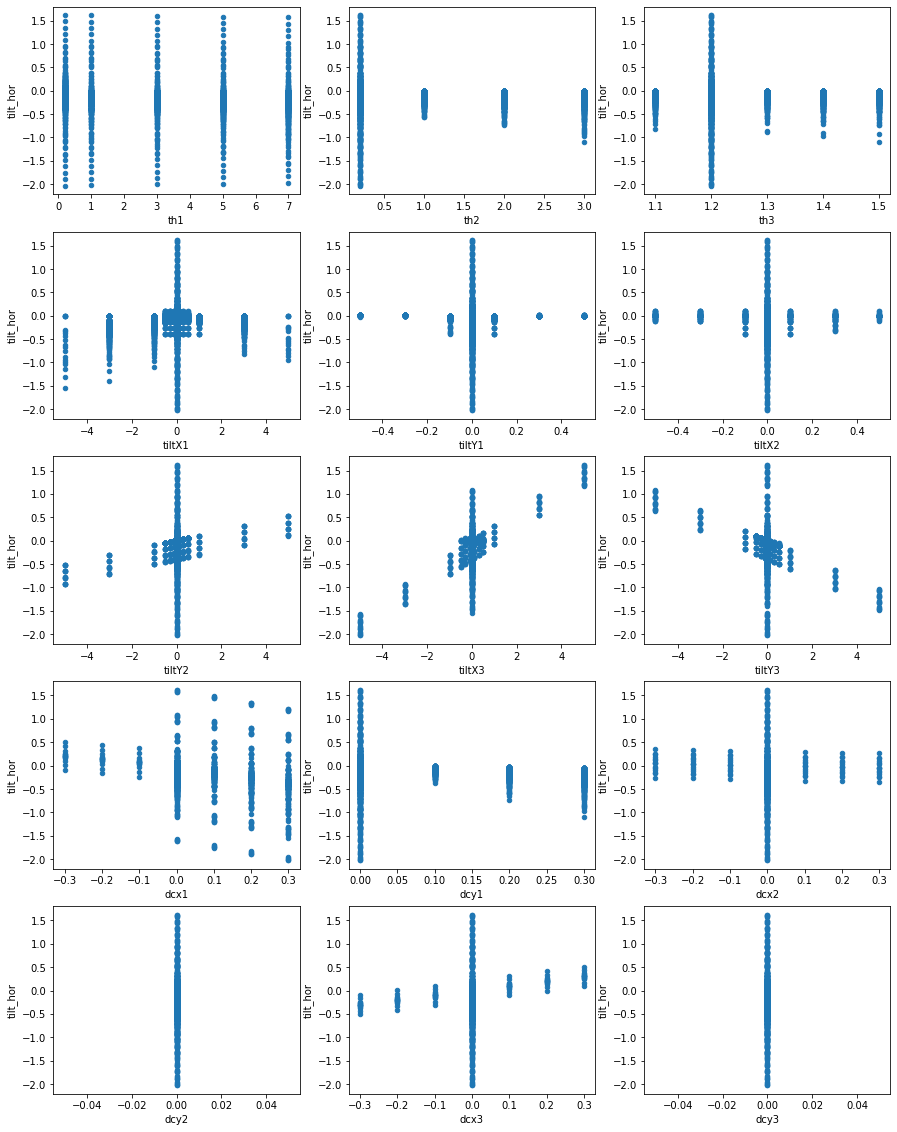

In [122]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
for idx, feature in enumerate(zern.df.columns[:15]):
    zern.df.plot(feature, zernNames[0], subplots=True, kind="scatter", ax=axes[idx // 3, idx % 3])

In [186]:
from sklearn.linear_model import MultiTaskLassoCV

In [125]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [175]:
zern.df.columns[15:]

Index(['tilt_hor', 'tilt_vert', 'defocus', 'astigmatism_obl',
       'astigmatism_vert', 'coma_vert', 'coma_hor'],
      dtype='object')

In [259]:
df_shuffled = shuffle(zern.df, random_state=123)
X = scale(df_shuffled[df_shuffled.columns[15:]])
y = df_shuffled[paramNames]

In [260]:
df_shuffled = shuffle(zern.df, random_state=123)
X2 = scale(df_shuffled[df_shuffled.columns[:15]])
y2 = df_shuffled[zernNames]

In [261]:

alphas = np.arange(0.01, 1, 0.01)
lcv = MultiTaskLassoCV(cv=3, alphas=alphas)
lcv.fit(X2,y2)

MultiTaskLassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                 cv=3)

In [271]:

alphas = np.arange(0.01, 1, 0.01)
lcv = MultiTaskLassoCV(cv=3, alphas=alphas)
lcv.fit(X,y)

MultiTaskLassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                 cv=3)

In [189]:
print(lcv.alpha_)

0.01


In [202]:
len(lcv.coef_)

15

In [263]:
A = list(zip(df.columns[15:], lcv.coef_))

In [267]:
A[0][0]

'tilt_hor'

In [268]:
list(zip(df.columns[:15], A[0][1]))


[('th1', -0.007720204489788605),
 ('th2', -0.0018964294033375218),
 ('th3', 0.0012400990007068098),
 ('tiltX1', 0.019571458279004462),
 ('tiltY1', -0.0004451434708836026),
 ('tiltX2', -0.0029856199062471595),
 ('tiltY2', 0.025246217253693606),
 ('tiltX3', 0.11409341111313756),
 ('tiltY3', -0.0709041582279083),
 ('dcx1', -0.08584897506479795),
 ('dcy1', -0.04652273725976374),
 ('dcx2', 0.0),
 ('dcy2', 0.0),
 ('dcx3', 0.004460631940619223),
 ('dcy3', 0.0)]

In [269]:
zernNames[2]

'defocus'

In [203]:
list(zip(df.columns[:15], lcv.coef_))

[('th1',
  array([-0.08716083, -0.06041223,  0.44877704, -0.03070216,  0.05929489,
         -0.00106184, -0.07998424])),
 ('th2',
  array([ 0.05215657, -0.12180864,  0.51065818,  0.00410048,  0.14797257,
         -0.00580534,  0.05652728])),
 ('th3',
  array([ 0.0026772 , -0.0079192 ,  0.01391487,  0.00461844,  0.00013052,
         -0.00048814,  0.00302363])),
 ('tiltX1',
  array([-3.38975736e-03, -9.92918242e-01,  1.03979541e-01, -9.18277810e-03,
         -6.18277157e-02, -4.53771334e-02,  6.62006668e-04])),
 ('tiltY1',
  array([ 0.00034213, -0.00413013,  0.00115088,  0.00393064,  0.00065489,
         -0.00015801, -0.00028609])),
 ('tiltX2',
  array([-0.00095129, -0.00618581,  0.00318699,  0.00310119,  0.00042212,
         -0.0002353 , -0.0007997 ])),
 ('tiltY2',
  array([ 0.05560608, -0.00676516,  0.01955179,  0.01306527, -0.00316148,
         -0.00022642,  0.03776504])),
 ('tiltX3',
  array([ 0.15881002, -0.01673587,  0.05327173,  0.03757997, -0.01389968,
         -0.00055641,  0.12

In [205]:
pred = [lcv.predict(X)[0] for i]
pred_single = [item[0] for item in pred]

array([ 2.49523643e+00,  1.03590243e+00,  1.26608810e+00, -7.52970176e-02,
       -1.56847153e-04, -6.92212526e-03,  4.33229607e-02,  1.35909895e-01,
       -8.88198841e-02,  9.82665994e-03,  9.17827257e-02, -1.79918724e-04,
        0.00000000e+00,  1.23420012e-03,  0.00000000e+00])

In [252]:
paramNames

['th1',
 'th2',
 'th3',
 'tiltX1',
 'tiltY1',
 'tiltX2',
 'tiltY2',
 'tiltX3',
 'tiltY3',
 'dcx1',
 'dcy1',
 'dcx2',
 'dcy2',
 'dcx3',
 'dcy3']

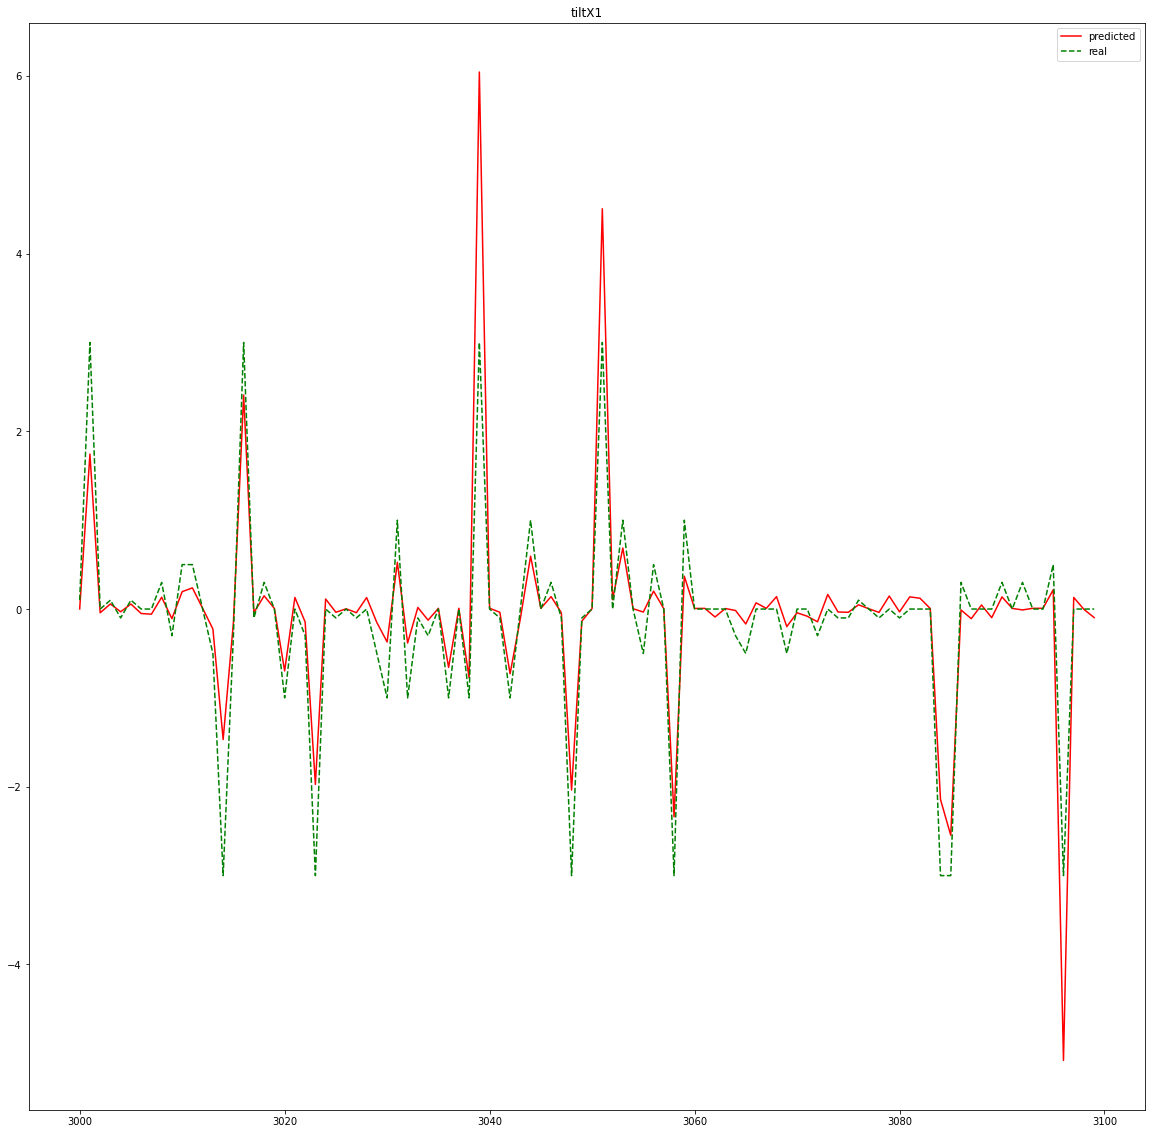

In [273]:
pred = lcv.predict(X)
feat_ind = 3
start = 3000
fin = start+100
pred_single = [item[feat_ind] for item in pred]
x = [i for i in range(len(pred))]
plt.rcParams["figure.figsize"] = (20,20)
plt.plot(x[start:fin], pred_single[start:fin], '-', c='r',label='predicted' )
plt.plot(x[start:fin], y[paramNames[feat_ind]][start:fin], '--', c='g',label='real' )
plt.title(paramNames[feat_ind])
plt.legend()


In [152]:
from sklearn.linear_model import Lasso, Ridge

In [157]:
lasso = Lasso(1)
lasso.fit(X, y)


Lasso(alpha=1)

In [166]:
ridge = Ridge(0.01)
ridge.fit(X, y)

Ridge(alpha=0.01)

In [158]:
lasso.coef_

array([ 2.25547214e+00,  6.59641306e+00,  0.00000000e+00, -6.81269519e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  2.71252249e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

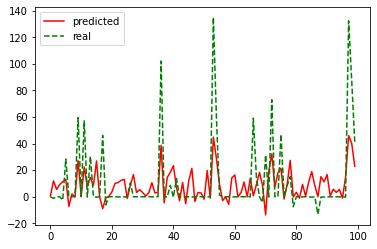

In [154]:
pred = lasso.predict(X)
x = [i for i in range(len(pred))]
plt.plot(x[:100], pred[:100], '-', c='r',label='predicted' )
plt.plot(x[:100], y[:100], '--', c='g',label='real' )
plt.legend()

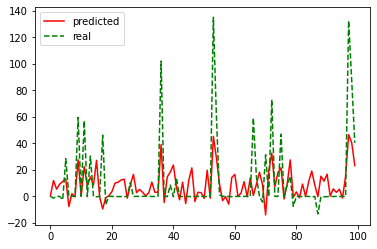

In [167]:
pred = ridge.predict(X)
x = [i for i in range(len(pred))]
plt.plot(x[:100], pred[:100], '-', c='r',label='predicted' )
plt.plot(x[:100], y[:100], '--', c='g',label='real' )
plt.legend()

In [274]:
import scipy.io
mat = scipy.io.loadmat('Zmso.mat')

In [275]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Dec 14 16:04:09 2021',
 '__version__': '1.0',
 '__globals__': ['Zmso'],
 'Zmso': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]])}

In [276]:
mat2 = scipy.io.loadmat('Zost.mat')

In [277]:
mat2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Dec 14 16:03:52 2021',
 '__version__': '1.0',
 '__globals__': ['Zost'],
 'Zost': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]])}